# Project: Investigate a Dataset (TMDb Movies Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>
> In this report, we will investigate TMDb Movies dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. We will investigate the data set and answer some questions as we go through the analysis. We will try to check the movie attributes that has impact on the rating. The folloiwng are some of the questions which we will go through:
>
> - Is there a relation between the movie budget and revenue?
> - How the vote avg change over the years.
> - Does the director have an impact on the movie vote?
> - what are the top rates Genres over the years?

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [149]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_movies = pd.read_csv("tmdb-movies.csv")

Let's print few records

In [150]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check the number of rows, columns, data types and available number of values in each column.

In [151]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Let's check the missing Values from each column.

In [152]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's check the duplicated rows.

In [153]:
df_movies.duplicated().sum()

1


### Data Cleaning (Dropping some rows and columns which are not benificial for our analysis)

Let's drop the duplicated rows.

In [154]:
df_movies.drop_duplicates(inplace = True)

In [155]:
df_movies.duplicated().sum()

0

Let's drop the columns homepage, tagline and keywords since they have missing values and we will not use them in our analysis.

In [156]:
df_movies.drop(["homepage","tagline","keywords"], axis=1, inplace=True)

In [157]:
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

Let's create one column "profit" which will have the value of revenue - budget

In [158]:
df_movies["profit"] = df_movies["revenue"] - df_movies["budget"]
df_movies["profit_adj"] = df_movies["revenue_adj"] - df_movies["budget_adj"]

In [159]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Let's check the distribution of some of the fields

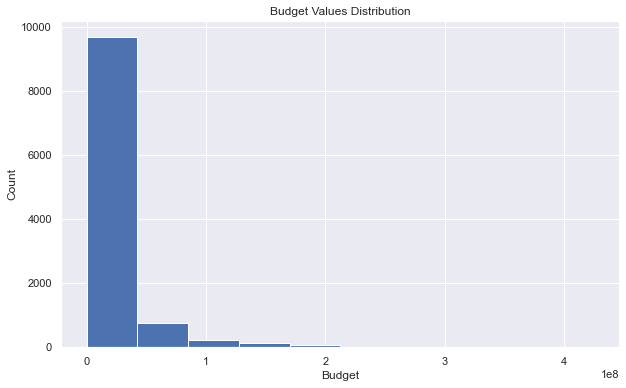

In [160]:
plt.figure(figsize=(10,6))
plt.hist(df_movies["budget"]);
plt.title("Budget Values Distribution")
plt.xlabel("Budget")
plt.ylabel("Count");

From the above chart, we can see that most of the movies has a budget of 10000000 and 100000000

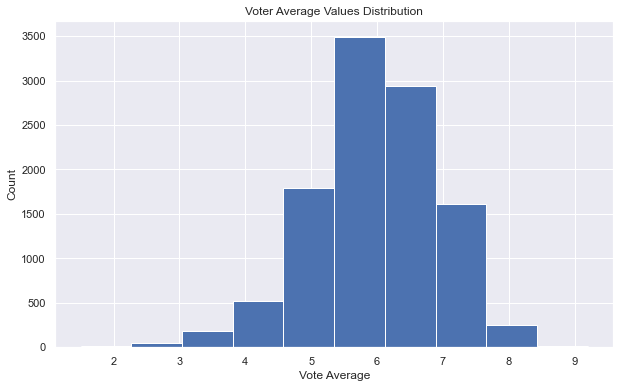

In [161]:
plt.figure(figsize=(10,6))
plt.hist(df_movies["vote_average"]);
plt.title("Voter Average Values Distribution")
plt.xlabel("Vote Average")
plt.ylabel("Count");

from the above charts, we can see that most the movies are rated between 5 and 8. The majority of these movies are rated between 5.5 and 7.

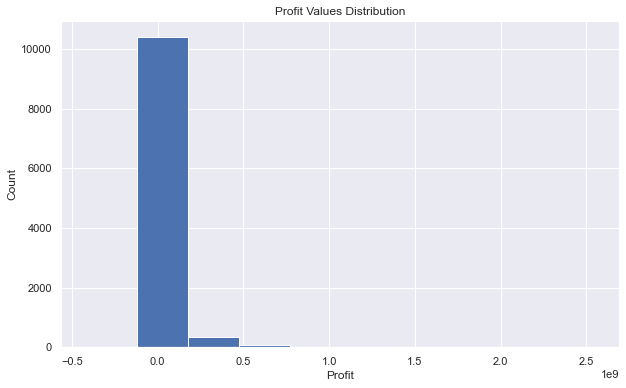

In [162]:
plt.figure(figsize=(10,6))
plt.hist(df_movies["profit"]);
plt.title("Profit Values Distribution")
plt.xlabel("Profit");
plt.ylabel("Count");

we can see from the above chart that most of the movies have the profit between 0 and 200000000 

In [163]:
df_movies["release_year"].value_counts().nlargest(10).index

Int64Index([2014, 2013, 2015, 2012, 2011, 2009, 2008, 2010, 2007, 2006], dtype='int64')

### Let's check the top 10 years based on the number of the release movies

Text(0.5, 1.0, 'Top 10 years based on the nuber of released movies')

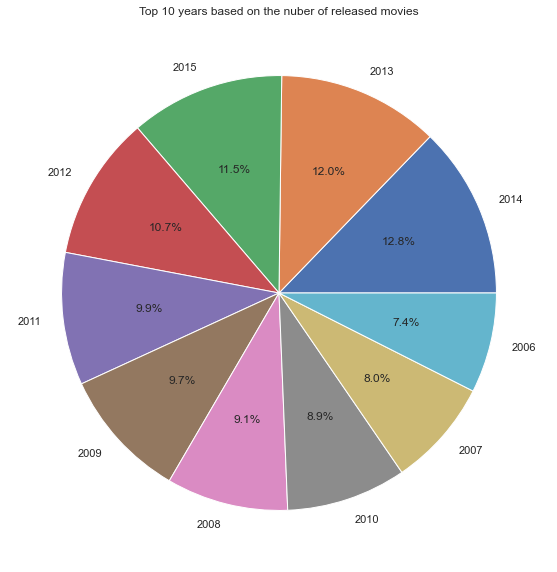

In [164]:
plt.figure(figsize=(20,10))
plt.pie(df_movies["release_year"].value_counts().nlargest(10),
        labels=df_movies["release_year"].value_counts().nlargest(10).index,autopct='%1.1f%%',);
plt.title("Top 10 years based on the nuber of released movies")


### Is there a relation between the movie budget and revenue?

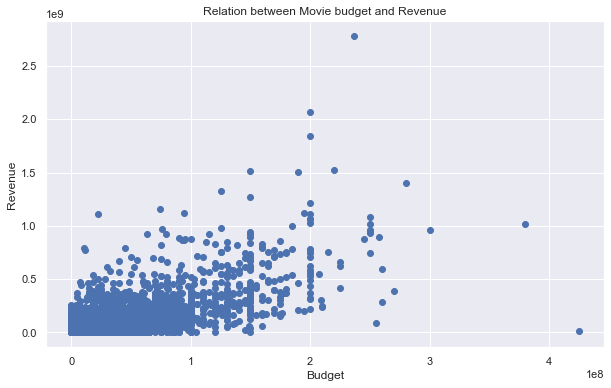

In [165]:
plt.figure(figsize=(10,6))
plt.scatter(df_movies["budget"],df_movies["revenue"]);
plt.title("Relation between Movie budget and Revenue")
plt.xlabel("Budget");
plt.ylabel("Revenue");

from the above graph, we can see that there is a positive relationship between the movie budget and its revenue. WHen the budget increases, the revenue increases as well.

### Research Question 1 (How the vote avg change over the years)

Let's group our data by the release year column and investigate the mean of the vote_average and the sum of the vote_counts

In [166]:
df_movies.groupby("release_year").agg({"vote_average":"mean","vote_count":"sum"})

,vote_average,vote_count
release_year,,
1960,6.325000,2481
1961,6.374194,2405
1962,6.343750,2392
1963,6.329412,2816
1964,6.211905,3137
1965,6.194286,1820
1966,6.128261,1460
1967,6.242500,3102
1968,6.379487,4217


we can see that the vote average is slightly decreasing over the years. This could indicate that the quality of the movies is decreasing as well or different movies genres has been intruduced which users don't like. Also, we can see that the number of viewers is noticably increasing. This also could impact the movie rating because of the many genres we have now and users will not like some kind of them.

### Research Question 2  (Does the director have an impact on the movie vote?)

let's group our dataset by the director column and investigate the top ten directors who have thee highest number of movies votes and check the average rate.

In [167]:
df_movies.groupby("director").agg({"vote_average":"mean","id":"count","vote_count":"sum"}).sort_values("vote_count",ascending=False).nlargest(10,"vote_count")

,vote_average,id,vote_count
director,,,
Christopher Nolan,7.470000,10,41759
Steven Spielberg,6.824138,29,36735
Peter Jackson,7.000000,13,31796
Quentin Tarantino,7.354545,11,27894
Ridley Scott,6.478261,23,24801
David Fincher,7.210000,10,22191
James Cameron,6.830000,10,21784
Robert Zemeckis,6.705882,17,21532
Martin Scorsese,6.958621,29,18819


we can see from the above table that, although the directors have directed many movies and the vote count is high which means the variaty of users, the avererage vote is still high. This is an indication that the director has an impact on the movie vote.

### Research Question 3  (Does the Genre has an impact on the movie vote?)

Let's check the genres field format

In [168]:
df_movies["genres"]

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

Due to the complexity of the values in the genres columns, we will split the movies with multiple genre into multiple records with single genre.

In [169]:
genres = df_movies[["id","genres"]].set_index("id")["genres"].str.split("|",expand=True).stack().reset_index(level=1,drop=True).reset_index()

let's check sample records

In [170]:
genres.columns = ["id","genre"]

In [171]:
genres.head()

,id,genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


we can see that multiple records for the same movie id with a single genre

we will take some columns from the movies df and join it with the genres df we just created above and check what genres have the highest votes. 

In [172]:
sub_movies = df_movies[["id","release_year","vote_average","vote_count"]]

In [173]:
sub_movies = sub_movies.merge(genres, on="id", how="left")

In [174]:
sub_movies.head()

,id,release_year,vote_average,vote_count,genre
0,135397,2015,6.5,5562,Action
1,135397,2015,6.5,5562,Adventure
2,135397,2015,6.5,5562,Science Fiction
3,135397,2015,6.5,5562,Thriller
4,76341,2015,7.1,6185,Action


let's group by genre and check which genre has the highest vote in general.

In [175]:
sub_movies.groupby("genre").agg({"vote_average":"mean","vote_count":"sum"}).nlargest(10,"vote_average")

,vote_average,vote_count
genre,,
Documentary,6.908462,18255
Music,6.480392,50731
History,6.410479,61380
Animation,6.403147,211797
War,6.297778,73098
Drama,6.165546,868912
Crime,6.124889,377502
Western,6.083030,33947
Romance,6.042874,284313


The above genres have the highest vote average.However, if we look at the vote count for some of them we will find that it is low. Let's check the genres which have the highest vote count

In [176]:
sub_movies.groupby("genre").agg({"vote_average":"mean","vote_count":"sum"}).nlargest(10,"vote_count").sort_values("vote_average",ascending=False)

,vote_average,vote_count
genre,,
Drama,6.165546,868912
Crime,6.124889,377502
Romance,6.042874,284313
Family,5.997563,335227
Adventure,5.940585,754807
Comedy,5.905167,669223
Fantasy,5.863537,385399
Action,5.787752,936897
Thriller,5.750671,742693


Huge difference in the number of votes in the above table compared to the previous one.

Let's visualize the above table

<AxesSubplot:title={'center':'Avg votes for genres with highest number of votes count'}, xlabel='Genre', ylabel='Average Vote'>

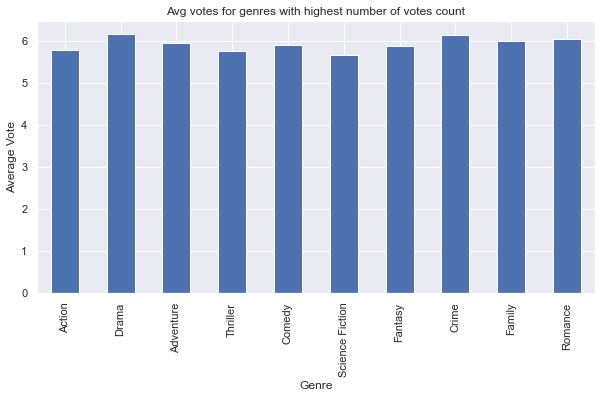

In [177]:
sub_movies.groupby("genre").agg({"vote_average":"mean","vote_count":"sum"}).nlargest(10,"vote_count")["vote_average"].plot(kind="bar",xlabel="Genre",
                                                                                                                           title="Avg votes for genres with highest number of votes count",
                                                                                                                           ylabel="Average Vote",figsize=(10,5))


### Research Question 4  (what are the top rates Genres over the years?)

we will chech the top rated genres over the year given that there is more than 1000 votes for the genre.

let's group the data by the release year and genre and calculate the mean vote_average and the sum of vote_count

In [178]:
top_genres_year = sub_movies.groupby(["release_year","genre"]).agg({"vote_average":"mean","vote_count":"sum"}).reset_index()

In [179]:
top_genres_year.head(1)

,release_year,genre,vote_average,vote_count
0,1960,Action,6.05,527


let's extract the years available in the dataset

In [180]:
years = list(top_genres_year["release_year"].unique())

let's extract the top rated genres for each year given that we have more than 1000 votes.

In [181]:
for year in years:
    max_vote= top_genres_year[(top_genres_year["release_year"]==year) & (top_genres_year["vote_count"]>1000)]["vote_average"].max()
    genre = top_genres_year[(top_genres_year["release_year"]==year) & (top_genres_year["vote_average"]==max_vote)]["genre"].values
    print("top genre in {} is {}".format(year,genre))

top genre in 1960 is ['Thriller']
top genre in 1961 is ['Comedy']
top genre in 1962 is ['Drama']
top genre in 1963 is ['Adventure']
top genre in 1964 is ['Drama']
top genre in 1965 is ['Drama']
top genre in 1966 is []
top genre in 1967 is ['Drama']
top genre in 1968 is ['Mystery']
top genre in 1969 is ['Drama']
top genre in 1970 is ['Comedy']
top genre in 1971 is ['Action']
top genre in 1972 is ['Crime']
top genre in 1973 is ['Crime']
top genre in 1974 is ['Drama']
top genre in 1975 is ['Adventure']
top genre in 1976 is ['Crime']
top genre in 1977 is ['Action']
top genre in 1978 is ['Drama']
top genre in 1979 is ['Drama']
top genre in 1980 is ['Drama']
top genre in 1981 is ['Adventure']
top genre in 1982 is ['Fantasy']
top genre in 1983 is ['Drama']
top genre in 1984 is ['Music']
top genre in 1985 is ['Family']
top genre in 1986 is ['Family']
top genre in 1987 is ['History']
top genre in 1988 is ['Animation']
top genre in 1989 is ['Animation']
top genre in 1990 is ['Romance']
top genre

### Research Question 5  (Does the production company has an impact on the movie vote?)

let's check the format of production companies field.

In [182]:
df_movies["production_companies"].head(1)

0    Universal Studios|Amblin Entertainment|Legenda...
Name: production_companies, dtype: object

we will do the same thing we did with genre field. We will process each movie records and translate it into multiple records with a single production company.

In [183]:
df_movies[["id","production_companies"]].set_index("id")["production_companies"].str.split("|",expand=True).stack().reset_index(level=1,drop=True).reset_index()

,id,0
0,135397,Universal Studios
1,135397,Amblin Entertainment
2,135397,Legendary Pictures
3,135397,Fuji Television Network
4,135397,Dentsu
...,...,...
23220,20379,Joel Productions
23221,20379,Douglas & Lewis Productions
23222,39768,Mosfilm
23223,21449,Benedict Pictures Corp.


In [184]:
production_companay = df_movies[["id","production_companies"]].set_index("id")["production_companies"].str.split("|",expand=True).stack().reset_index(level=1,drop=True).reset_index()

In [185]:
production_companay.columns=["id","company"]

In [186]:
production_companay.head(5)

,id,company
0,135397,Universal Studios
1,135397,Amblin Entertainment
2,135397,Legendary Pictures
3,135397,Fuji Television Network
4,135397,Dentsu


we can see from the above table that we have the same movie multiple times with a single production company.

Next, we will create a subset of the main dataset with the fields we need for the analysis

In [187]:
sub_movies = df_movies[["id","release_year","vote_average","vote_count","budget","revenue","profit"]]

Let's merge the subset with the production companies records based on the movie ID

In [188]:
top_companies = sub_movies.merge(production_companay,how="left",on="id")

let's group by production company and calculate the mean average_vote, the sum of the votes count and the number of movies produced.

In [189]:
top_companies.groupby("company").agg({"vote_average":np.mean,"vote_count":np.sum,"id":"count"}).sort_values("vote_count",ascending=False).nlargest(10,"vote_count")

,vote_average,vote_count,id
company,,,
Warner Bros.,6.168566,277663,509
Universal Pictures,6.072222,212252,522
Paramount Pictures,6.148260,180608,431
Twentieth Century Fox Film Corporation,6.115603,171731,282
Columbia Pictures,6.025735,139810,272
Walt Disney Pictures,6.176168,134398,214
New Line Cinema,5.918721,99072,219
Legendary Pictures,6.358974,85947,39
Village Roadshow Pictures,6.020455,74070,88


We can see in the above cell that movies which were produced by some copamies have a higher vote average and a higher vote counts. This means that production companies have impact on the number of viewers and the vote.

___________________

__Now, we will extract some generic insights from the dataset with visualization__

### Research Question 6  (What are the top 5 movies based on the profit?)


let's take the top 5 movies based on the profit

In [190]:
df_movies[["original_title","profit"]].nlargest(5,"profit")

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360


Let's visualize it

<AxesSubplot:title={'center':'Top 5 Movies Based on Profit'}, xlabel='Movie', ylabel='Profit'>

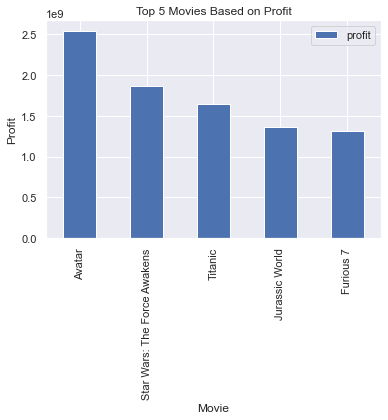

In [191]:
df_movies[["original_title","profit"]].nlargest(5,"profit").plot("original_title","profit",kind="bar",
                                                                 xlabel = "Movie",ylabel = "Profit", title= "Top 5 Movies Based on Profit")

### Research Question 7  (What are the production comapnies that made the highest profits from movies?)

Let's use the top_companies dataframe we created earlier and group by compane. Then we will sum the profit for each company and find out the top 5 companies based on profit.

In [192]:
top_companies.groupby("company").sum().nlargest(5,"profit")["profit"]

company
Warner Bros.                              34703823331
Universal Pictures                        32575422791
Paramount Pictures                        27538581413
Twentieth Century Fox Film Corporation    27402754987
Walt Disney Pictures                      22008457637
Name: profit, dtype: int64

<AxesSubplot:title={'center':'Top 5 production Comapnies Based on Profit'}, xlabel='Production Company', ylabel='Profit'>

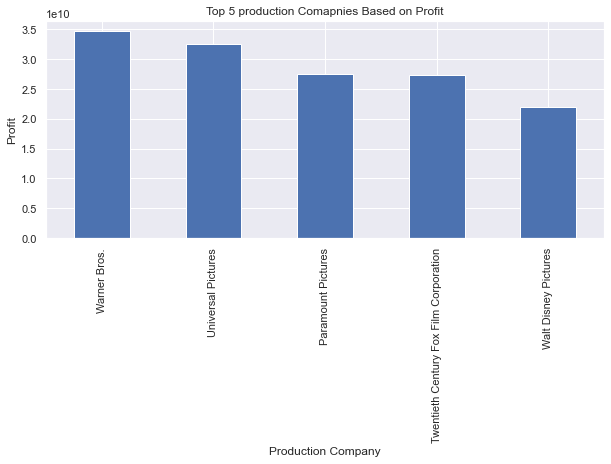

In [193]:
top_companies.groupby("company").sum().nlargest(5,"profit")["profit"].plot(kind="bar",xlabel="Production Company",
                                                                          title="Top 5 production Comapnies Based on Profit", ylabel="Profit",figsize=(10,4))

__let's create a function that will split the concatenated field to seperate it by "|" and convert it in multiple records. The function will do the join with the required features of the main data frame__

In [194]:
def split_records(field):
    df = df_movies[["id",field]].set_index("id")[field].str.split("|",expand=True).stack().reset_index(level=1,drop=True).reset_index()
    df.columns=["id",field]
    sub_movies = df_movies[["id","release_year","vote_average","vote_count","budget","revenue","profit"]]
    merged_df = sub_movies.merge(df,how="left",on="id")
    return merged_df

let's test it on cast field

In [195]:
actors = split_records("cast")

In [196]:
actors.head()

,id,release_year,vote_average,vote_count,budget,revenue,profit,cast
0,135397,2015,6.5,5562,150000000,1513528810,1363528810,Chris Pratt
1,135397,2015,6.5,5562,150000000,1513528810,1363528810,Bryce Dallas Howard
2,135397,2015,6.5,5562,150000000,1513528810,1363528810,Irrfan Khan
3,135397,2015,6.5,5562,150000000,1513528810,1363528810,Vincent D'Onofrio
4,135397,2015,6.5,5562,150000000,1513528810,1363528810,Nick Robinson


In [197]:
actors.shape

(52644, 8)

   ### Research Question 8  (Who are the actors that have the high movies profit ?)

we will use the actors dataframe we created above and rename the column cast to actor to be more meaningful

In [198]:
actors.rename(columns={"cast":"actor"},inplace=True)

Let's group by actor and calculate the sum of the profit for the movies and find the top 10 actors

In [199]:
actors.groupby("actor")["profit"].sum().nlargest(10)

actor
Harrison Ford        6890890695
Emma Watson          6683916698
Daniel Radcliffe     6510006691
Tom Hanks            6465142612
Tom Cruise           6448436186
Rupert Grint         6408691044
Ian McKellen         6125046043
Robert Downey Jr.    5551489468
Ralph Fiennes        5299227496
Cameron Diaz         5135739015
Name: profit, dtype: int64

Let's visualize the result

<AxesSubplot:title={'center':'Actors with highest movies profit'}, xlabel='Actors', ylabel='Movies Profit'>

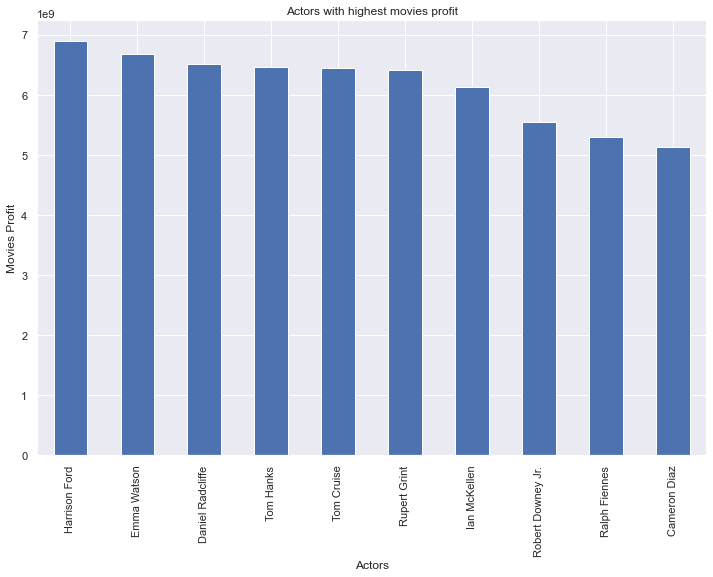

In [200]:
actors.groupby("actor")["profit"].sum().nlargest(10).plot(kind="bar",figsize=(12,8),xlabel="Actors",ylabel="Movies Profit",
                                                          title="Actors with highest movies profit")

<a id='conclusions'></a>
## Conclusions
After the analysis we have done as part of this project, the folloiwng are information we gained:

- There is a positive relationship between the movie budget and its revenue.
- The majority of these movies are rated between 5.5 and 7.
- the vote average is slightly decreasing over the years. This could indicate that the quality of the movies is decreasing as well or different movies genres has been intruduced which users don't like. Also, we can see that the number of viewers is noticably increasing. This also could impact the movie rating because of the many genres we have now and users will not like some kind of them.
- The quality of the director has an impact of the movie rating.
- The top rated Movie genres are drama,crime,romance, family and adventure.
- The top production companies based on vote_average are Warner Bros., Universal Pictures, Paramount Pictures, wentieth Century Fox Film Corporation and Columbia Pictures
- The top actors based on the profit are Harrison Ford, Emma Watson, Daniel Radcliffe, Tom Hanks and Tom Cruise .

Fortunately, the available dataset was suffecient for the analysis and we didn't face any limitation and we didn't need to redo any previous steps we have done the wrangling phase.